<a href="https://colab.research.google.com/github/toobask/introtoAI1/blob/main/IntroToAI_701_CourseWork_Amua_et_Tooba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries & Dependencies

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

## Data Loading, Exploration, & Preprocessing

### Load Data

In [5]:
#load vehicle dataset
#vehicle_df = pd.read_csv("../dataset/vehicle_data.csv")
vehicle_df = pd.read_csv("https://raw.githubusercontent.com/toobask/introtoAI1/main/dataset/vehicle_data.csv")

In [6]:
#check shape of df
vehicle_df.shape
print(f"This dataframe contains {vehicle_df.shape[0]} rows and {vehicle_df.shape[1]} columns.")

This dataframe contains 123971 rows and 19 columns.


In [7]:
#view first 5 rows
vehicle_df[:5]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00


In [8]:
#display column names
vehicle_df.columns

Index(['Title', 'Sub_title', 'Price', 'Brand', 'Model', 'Edition', 'Year',
       'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Location', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
       'published_date'],
      dtype='object')

### EDA

Here, we explore individual features.

#### Title & Sub-title

In [11]:
#view content of title and sub title columns
vehicle_df[["Title", "Sub_title"]]

,Title,Sub_title
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur..."
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku..."
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo"
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo"
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha"
...,...,...
123966,Honda Insight Ze3 2012,"Posted by Duminda on 2021-11-04 11:41 pm, Ja-Ela"
123967,HINO Dutro 2011 Lorry,"Posted by Areej on 2021-11-04 11:39 pm, Colombo"
123968,TVS King 2017 Three,"Posted by Safan on 2021-11-04 11:38 pm, Colombo"
123969,Toyota Vitz 2018,Posted by Sampath Kodithuwakku on 2021-11-04 1...


#### Brand

In [13]:
#view brand column
vehicle_df.Brand

0          Honda
1         Jaguar
2         Toyota
3         Toyota
4         Toyota
           ...  
123966     Honda
123967      HINO
123968       TVS
123969    Toyota
123970    Suzuki
Name: Brand, Length: 123971, dtype: object

In [14]:
#view unique brands
vehicle_df.Brand.unique()

array(['Honda', 'Jaguar', 'Toyota', 'Mitsubishi', 'Suzuki', 'MG',
       'Peugeot', 'BMW', 'Mercedes Benz', 'Mazda', 'Land Rover',
       'Hyundai', 'Micro', 'Audi', 'Daihatsu', 'Nissan', 'Lexus', 'Kia',
       'Tata', 'Perodua', 'Ford', 'Chery', 'Renault', 'Aston Martin',
       'Chevrolet', 'Other brand', 'Subaru', 'Alfa Romeo', 'Zotye',
       'DFSK', 'Mahindra', 'Skoda', 'Volkswagen', 'Maruti Suzuki', 'Jeep',
       'Ssang Yong', 'Hummer', 'Datsun', 'Tesla', 'Mini', 'Isuzu', 'Fiat',
       'Porsche', 'Morris', 'Austin', 'Opel', 'Daewoo', 'Proton', 'Volvo',
       'Rover', 'Chrysler', 'Maruti', 'Geely', 'Citroen', 'Smart',
       'Moto Guzzi', 'Vauxhall', 'Pontiac', 'SEAT', 'Changan', 'Buick',
       'TVS', 'Hero', 'Mercedes-Benz', 'Bajaj', 'Piaggio', 'Yamaha',
       'Other', 'JAC', 'FAW', 'Ashok-Leyland', 'Komatsu', 'Kubota',
       'Eicher', 'Massey-Ferguson', 'Ranomoto', 'Force', 'Demak',
       'Hero-Honda', 'Sonalika', 'Foton', 'Kinetic', 'Yanmar', 'Kobelco',
       'Loncin', 

In [15]:
#how many brands are there?
print(f"There are {vehicle_df.Brand.nunique()} unique vehicle brands.")

There are 123 unique vehicle brands.


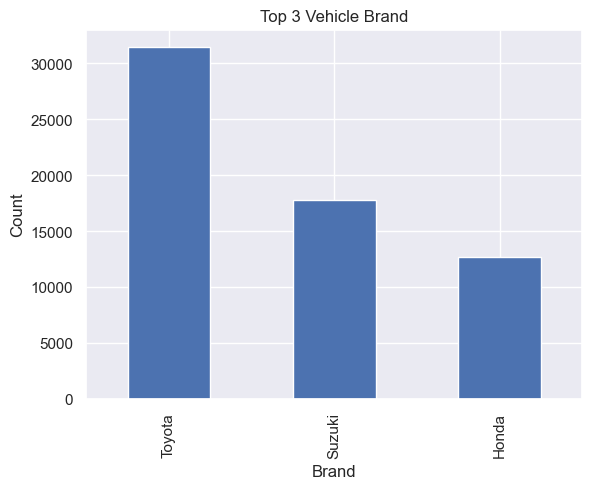

In [16]:
#what are the top 3 brands
top3_brands = vehicle_df.Brand.value_counts().head(3)

#plot top3 brands
top3_brands.plot(kind="bar")
plt.title("Top 3 Vehicle Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

#### Model

In [27]:
#view model column
vehicle_df.Model

0                      Vezel
1                         XF
2                        CHR
3                        CHR
4         Land Cruiser Prado
                 ...        
123966           Insight Ze3
123967                 Dutro
123968                  King
123969                  Vitz
123970                  Alto
Name: Model, Length: 123971, dtype: object

In [ ]:
#how many vehicle models are present in the dataset
print(f"There are {vehicle_df.Model.nunique()} unique vehicle models.")

Text(0, 0.5, 'Count')

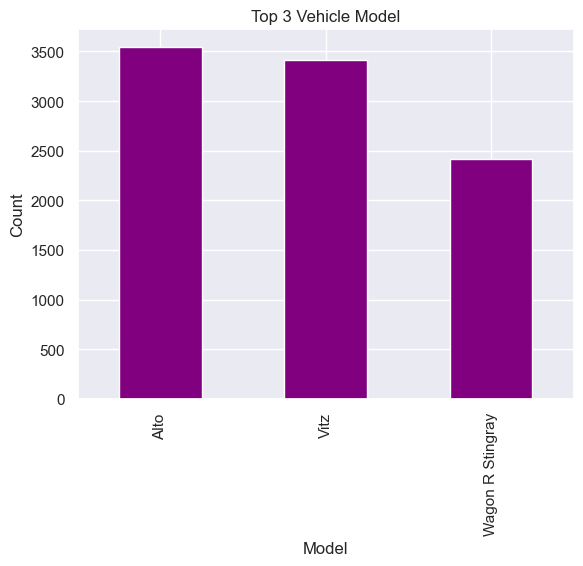

In [29]:
#what are the top3 models
top3_models = vehicle_df.Model.value_counts().head(3)

#show top3 models in a plot
top3_models.plot(kind="bar", color="purple")
plt.title("Top 3 Vehicle Model")
plt.xlabel("Model")
plt.ylabel("Count")

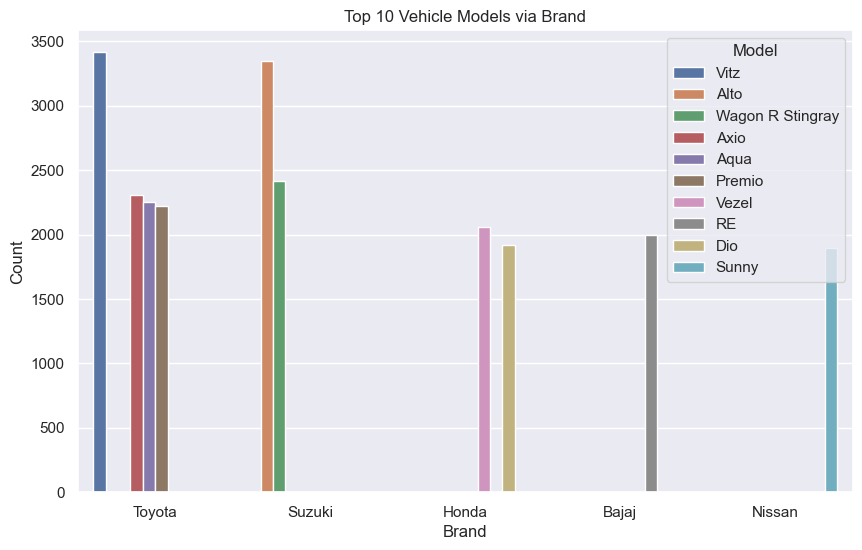

In [31]:
#group data by brand and model
brand_model = vehicle_df.groupby(["Brand", "Model"]).size().reset_index(name="Count")

#retrieve top 5 brand and model
top10_brand_model = brand_model.sort_values(by="Count", ascending=False).head(10)

#plot top 5 brand and model
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_brand_model, x="Brand", y="Count", hue="Model")
plt.title("Top 10 Vehicle Models via Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

#### Edition

In [34]:
#inspect edition column
vehicle_df.Edition

0                 Limited
1            Fully Loaded
2         GT New Face 2wd
3                  Toyato
4                   prado
               ...       
123966                NaN
123967                NaN
123968                NaN
123969                NaN
123970                NaN
Name: Edition, Length: 123971, dtype: object

In [36]:
#check number of null values in Edition column
vehicle_df.Edition.isnull().sum()

76433

In [38]:
#how many unique editions
print(f"There are {vehicle_df.Edition.nunique()} unique editions.")

There are 15260 unique editions.


In [40]:
#count unique editions
vehicle_df.Edition.value_counts()

Edition
Toyota                 780
G Grade                629
G Superior             608
Suzuki                 390
-                      346
                      ... 
106 hilux 4wd            1
SURF 4WD                 1
Extreme Full Option      1
GP2 Navy                 1
G -TURBO                 1
Name: count, Length: 15260, dtype: int64

#### Year

In [43]:
#view first 5 samples of year column
vehicle_df.Year.head()

0    2017
1    2013
2    2020
3    2017
4    2015
Name: Year, dtype: int64

In [45]:
#what year occurs the most
vehicle_df.Year.value_counts()

Year
2015    11547
2017    11066
2018    10228
2016     8768
2014     7878
        ...  
1937        1
2557        1
2561        1
2550        1
1949        1
Name: count, Length: 89, dtype: int64

In [47]:
#unique years represented
vehicle_df.Year.unique()

array([2017, 2013, 2020, 2015, 2007, 2018, 2019, 2016, 2008, 1995, 2012,
       2014, 2010, 1985, 2003, 2005, 1999, 2004, 2001, 2011, 1982, 1989,
       1980, 2006, 2009, 1993, 2000, 1990, 1988, 1981, 1983, 1979, 2002,
       1978, 1991, 1996, 1997, 1984, 2021, 1998, 1987, 1986, 1992, 1994,
       1960, 1975, 1958, 1971, 1976, 1956, 1959, 1953, 1967, 1969, 1973,
       1972, 1951, 1955, 1946, 1968, 1961, 1970, 1974, 1966, 1977, 1937,
       1963, 1947, 1952, 1965, 1950, 1927, 1957, 1964, 1945, 1935, 1936,
       1938, 1962, 1922, 2022, 1954,    0, 1948, 1900, 2557, 2561, 2550,
       1949], dtype=int64)

In [49]:
#replace invalid years (0, 2557, 2561, 2550) with NaN
vehicle_df.Year = vehicle_df.Year.replace([0, 2557, 2561, 2550], np.nan)

In [51]:
#how many years are represented?
vehicle_df.Year.nunique()

85

In [53]:
#range of years represented
range = vehicle_df.Year.sort_values().unique()
print(f"The years represented range from {range[0]} to {range[-2]}.")

The years represented range from 1900.0 to 2022.0.


#### Condition

In [56]:
#view unique vehicle condition
vehicle_df.Condition.unique()

array(['Used', 'Reconditioned', 'New', 'e', 'Recondition'], dtype=object)

In [58]:
#count values in vehicle condition column
vehicle_df.Condition.value_counts()

Condition
Used             120207
Reconditioned      1465
Recondition        1076
e                   617
New                 606
Name: count, dtype: int64

In [60]:
#replace recondition with reconditioned and e with NaN
vehicle_df.Condition = vehicle_df.Condition.replace({"Recondition": "Reconditioned", "e": np.nan})

In [62]:
#confirm changes
vehicle_df.Condition.value_counts()

Condition
Used             120207
Reconditioned      2541
New                 606
Name: count, dtype: int64

In [64]:
#check for missing values in condition column
vehicle_df.Condition.isna().sum()

617

#### Transmission

In [67]:
#view the transmission column
vehicle_df.Transmission

0         Automatic
1         Automatic
2         Automatic
3         Automatic
4         Automatic
            ...    
123966    Automatic
123967       Manual
123968       Manual
123969    Automatic
123970       Manual
Name: Transmission, Length: 123971, dtype: object

In [69]:
#what unique types of transmission are there?
vehicle_df.Transmission.unique()

array(['Automatic', 'Manual', 'Tiptronic', 'Other transmission', '2001',
       '11', '150', '2', '0', '1490', '1000', '444444444', '450', nan,
       '205', '200', '125', '1200', '50', '175', '1500', '650'],
      dtype=object)

In [71]:
#display value counts of unique transmission
vehicle_df.Transmission.value_counts()

Transmission
Automatic             75620
Manual                42954
Tiptronic              5319
Other transmission       45
205                       5
150                       5
175                       4
0                         4
1500                      2
50                        1
1200                      1
125                       1
200                       1
1000                      1
450                       1
444444444                 1
1490                      1
2                         1
11                        1
2001                      1
650                       1
Name: count, dtype: int64

In [73]:
#we see some invalid transmission types in the transmission column
#create list of valid transmission types
valid_transmissions = ["Automatic", "Manual", "Tiptronic", "Other transmission"]

#use list to filter out invalid transmission type
vehicle_df = vehicle_df[vehicle_df.Transmission.isin(valid_transmissions)]

In [75]:
#confirm changes
vehicle_df.Transmission.value_counts()

Transmission
Automatic             75620
Manual                42954
Tiptronic              5319
Other transmission       45
Name: count, dtype: int64

#### Body

In [78]:
#inspect body column
vehicle_df.Body

0            SUV / 4x4
1               Saloon
2            SUV / 4x4
3            SUV / 4x4
4            SUV / 4x4
              ...     
123966             Car
123967    Unregistered
123968     Three Wheel
123969             Car
123970             Car
Name: Body, Length: 123938, dtype: object

In [80]:
#check unique values in body column
vehicle_df.Body.unique()

array(['SUV / 4x4', 'Saloon', nan, 'Hatchback', 'MPV', 'Convertible',
       'CoupÃ©/Sports', 'Station wagon', 'Lorry', 'Van', 'Motorbike',
       'Pickup', 'Car', 'Three Wheel', 'SUV', 'Brand', 'Wagon', 'Other',
       'Tractor', 'Unregistered', 'Bus', 'Heavy-Duty', 'Cab'],
      dtype=object)

In [82]:
#get nnumber of unique values in body column
vehicle_df.Body.nunique()

22

In [84]:
#count unique values in body column
vehicle_df.Body.value_counts()

Body
Car              21981
Hatchback        21031
Saloon           18810
Motorbike        15723
SUV / 4x4        12641
Van               5593
Three Wheel       5078
Lorry             4245
SUV               3582
Station wagon     2683
Pickup            1492
Unregistered      1076
Bus               1070
Tractor            779
MPV                614
Brand              614
CoupÃ©/Sports      576
Wagon              513
Heavy-Duty         351
Convertible        230
Cab                158
Other                3
Name: count, dtype: int64

In [86]:
#group or add unregistered to other values in the body column
vehicle_df.Body = vehicle_df.Body.replace("Unregistered", "Other")

In [88]:
#confirm changes
vehicle_df.Body.value_counts()

Body
Car              21981
Hatchback        21031
Saloon           18810
Motorbike        15723
SUV / 4x4        12641
Van               5593
Three Wheel       5078
Lorry             4245
SUV               3582
Station wagon     2683
Pickup            1492
Other             1079
Bus               1070
Tractor            779
MPV                614
Brand              614
CoupÃ©/Sports      576
Wagon              513
Heavy-Duty         351
Convertible        230
Cab                158
Name: count, dtype: int64

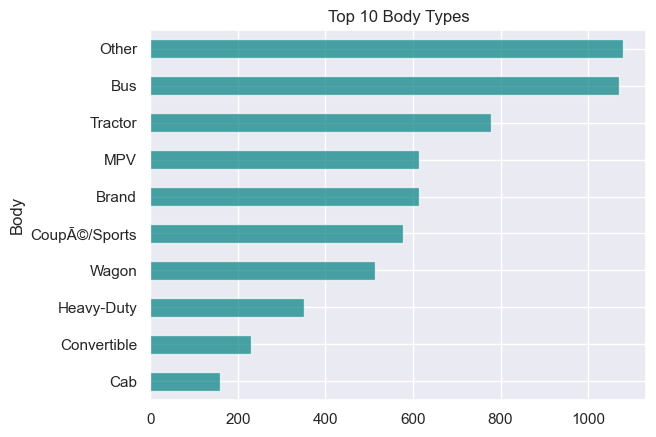

In [90]:
#top 10 body types
top10_body = vehicle_df.Body.value_counts().sort_values(ascending=True).head(10)

#plot top 10 body types
top10_body.plot(kind="barh", color="teal", alpha=0.7)
plt.title("Top 10 Body Types")
plt.show()

In [92]:
#check for missing values in Body column
vehicle_df.Body.isna().sum()

5095

#### Fuel

In [95]:
#what kind of fuel do the vehicles use?
vehicle_df.Fuel.unique()

array(['Hybrid', 'Diesel', 'Petrol', 'CNG', 'Electric', 'Other fuel type',
       'Gas'], dtype=object)

In [97]:
#what are the top 3 fuel models used
vehicle_df.Fuel.value_counts()[:3]

Fuel
Petrol    86702
Diesel    22771
Hybrid    13846
Name: count, dtype: int64

#### Capacity

In [100]:
#capacity
vehicle_df.Capacity.head()

0    1,500 cc
1    2,200 cc
2    1,200 cc
3    1,200 cc
4    2,700 cc
Name: Capacity, dtype: object

In [102]:
#what unique capacity types are present?
vehicle_df.Capacity.unique()

array(['1,500 cc', '2,200 cc', '1,200 cc', ..., '7300', '66', '5475'],
      dtype=object)

In [104]:
#how many unique capacity types are present
vehicle_df.Capacity.nunique()

1873

In [106]:
#convert values in capacity column to int
#first, we replace the commas and cc
vehicle_df.Capacity = vehicle_df.Capacity.str.replace(",", "")
vehicle_df.Capacity = vehicle_df.Capacity.str.replace("cc", "")

#next, convert to numeric column
vehicle_df.Capacity = pd.to_numeric(vehicle_df.Capacity, errors="coerce")

In [108]:
#view changes in capacity column
vehicle_df.Capacity.head()

0    1500.0
1    2200.0
2    1200.0
3    1200.0
4    2700.0
Name: Capacity, dtype: float64

In [110]:
#frequent 3 capacity range
vehicle_df.Capacity.value_counts().head(3)

Capacity
1500.0    20316
1000.0    10539
650.0      7759
Name: count, dtype: int64

#### Mileage

In [113]:
#view first 5 rows of mileage column
vehicle_df.Mileage.head()

0    37,000 km
1    42,000 km
2    15,000 km
3    21,000 km
4    57,000 km
Name: Mileage, dtype: object

In [115]:
#convert values in mileage column to int
#first, we replace the commas and km
vehicle_df.Mileage = vehicle_df.Mileage.str.replace(",", "")
vehicle_df.Mileage = vehicle_df.Mileage.str.replace("km", "")

#next, convert to numeric column
vehicle_df.Mileage = pd.to_numeric(vehicle_df.Mileage, errors="coerce")

In [117]:
#view changes
vehicle_df.Mileage.head()

0    37000.0
1    42000.0
2    15000.0
3    21000.0
4    57000.0
Name: Mileage, dtype: float64

#### Location

In [120]:
#view unique values in location column
vehicle_df.Location.unique()

array([' Kurunegala City,  Kurunegala', ' Colombo 7,  Colombo',
       ' Kelaniya,  Gampaha', ' Gampaha City,  Gampaha',
       ' Maharagama,  Colombo', ' Angoda,  Colombo',
       ' Boralesgamuwa,  Colombo', ' Galle City,  Galle',
       ' Rambukkana,  Kegalle', ' Ruwanwella,  Kegalle',
       ' Negombo,  Gampaha', ' Nugegoda,  Colombo',
       ' Anuradhapura City,  Anuradhapura', ' Kohuwala,  Colombo',
       ' Ragama,  Gampaha', ' Katugastota,  Kandy',
       ' Wennappuwa,  Puttalam', ' Embilipitiya,  Ratnapura',
       ' Colombo 2,  Colombo', ' Panadura,  Kalutara',
       ' Piliyandala,  Colombo', ' Digana,  Kandy',
       ' Tissamaharama,  Hambantota', ' Dehiwala,  Colombo',
       ' Godagama,  Colombo', ' Kaduwela,  Colombo', ' Wattala,  Gampaha',
       ' Malabe,  Colombo', ' Kottawa,  Colombo', ' Kotte,  Colombo',
       ' Colombo 6,  Colombo', ' Battaramulla,  Colombo',
       ' Colombo 4,  Colombo', ' Jaffna City,  Jaffna',
       ' Ja-Ela,  Gampaha', ' Kandana,  Gampaha', '

In [122]:
#get number of unique locations present
vehicle_df.Location.nunique()

328

#### Description & Post Url

In [125]:
#view contents of description and post url columns
vehicle_df[["Description", "Post_URL"]]

,Description,Post_URL
0,HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...
1,1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...
2,2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...
3,Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...
4,Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...
...,...,...
123966,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/honda-insight-ze3-s...
123967,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/hino-dutro-sale-col...
123968,-,https://riyasewana.com/buy/tvs-king-sale-colom...
123969,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/toyota-vitz-sale-ta...


#### Seller Name & Type

In [128]:
#view content of seller name and seller type columns
vehicle_df[["Seller_name", "Seller_type"]]

,Seller_name,Seller_type
0,Prasad Enterprises,Premium-Member
1,Dhanushka Dharmasri,Member
2,Carzone Lanka,Member
3,Carzone Lanka,Member
4,Shine Music Center,Member
...,...,...
123966,Duminda,Member
123967,Areej,Member
123968,Safan,Member
123969,Sampath Kodithuwakku,Member


In [130]:
#inspect uniqueness of seller type column
vehicle_df["Seller_type"].unique()

array(['Premium-Member', 'Member'], dtype=object)

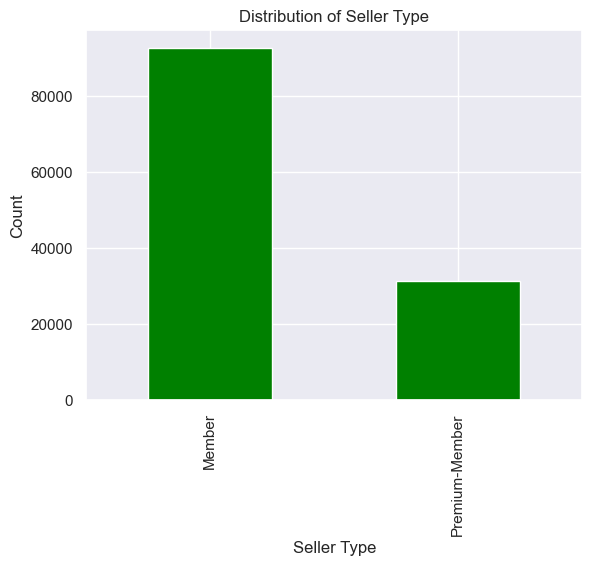

In [132]:
#view distribution of seller type
vehicle_df["Seller_type"].value_counts()

#plot distribution
vehicle_df["Seller_type"].value_counts().plot(kind="bar", color="green")
plt.title("Distribution of Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Count")
plt.show()

#### Published Date

In [135]:
#view published date column
vehicle_df["published_date"]

0         2022-09-01 14:45:00
1         2022-09-28 10:23:00
2         2022-09-16 13:16:00
3         2022-09-30 10:12:00
4         2022-09-30 21:50:00
                 ...         
123966    2021-11-04 23:41:00
123967    2021-11-04 23:39:00
123968    2021-11-04 23:38:00
123969    2021-11-04 23:38:00
123970    2021-11-04 23:37:00
Name: published_date, Length: 123938, dtype: object